# 0. Install and Import Dependencies

In [1]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.0.0
aiohttp                       3.9.1
aiosignal                     1.3.1
annotated-types               0.6.0
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
asttokens                     2.4.1
astunparse                    1.6.3
async-timeout                 4.0.3
atex                          0.0.6
attrs                         23.1.0
beautifulsoup4                4.12.2
bleach                        6.1.0
cachetools                    5.3.2
certifi                       2023.11.17
cffi                          1.16.0
charset-normalizer            3.3.2
clang                         16.0.1.1
click                         8.1.7
cloudpickle                   3.0.0
comm                          0.2.1
contourpy                     1.2.0
cubinlinker                   0.3.0+2.gcaa79ae
cuda-python                   12.3.0rc4+8.g134d586
cudf    

In [4]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [5]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [3]:
import gdown

In [36]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.usercontent.google.com/download?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=ad8d963e-8027-406d-a600-dced351646f5
To: /lip_into_text/private/data.zip
100%|██████████| 423M/423M [00:35<00:00, 11.8MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [92]:
def load_video(path:str) -> List[float]: 
    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        print("Original frame shape:", frame.shape)
        frame = tf.image.rgb_to_grayscale(frame)
        frame = frame[190:236,80:220,:]
        print("Cropped frame shape:", frame.shape)
        frame = tf.image.resize(frame, target_shape[1:3])  # Resize the frame
        print("Resized frame shape:", frame.shape)
        frames.append(frame)
    cap.release()
    
  .math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std


Original frame shape: (288, 360, 3)
Cropped frame shape: (46, 140, 1)
Original frame shape: (288, 360, 3)
Cropped frame shape: (46, 140, 1)
Original frame shape: (288, 360, 3)
Cropped frame shape: (46, 140, 1)


2024-03-09 16:27:46.907602: W tensorflow/core/framework/op_kernel.cc:1827] UNKNOWN: NameError: name 'target_shape' is not defined
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/tmp/ipykernel_8380/943023924.py", line 8, in load_data
    frames = load_video(video_path)

  File "/tmp/ipykernel_8380/3042313302.py", line 10, in load_video
    frame = tf.image.resize(frame, target_shape[1:3])  # Resize the frame

NameError: name 't

In [6]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [7]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [7]:
import tensorflow as tf

# Set memory growth for all GPUs
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)


In [8]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [14]:
char_to_num(['n','i','c','k']).numpy()

[array([14,  9,  3, 11], dtype=int64)]

In [54]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [55]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [56]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [57]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [58]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    #file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments  #returns preprocessed data

In [59]:
test_path = './data/s1/bbal6n.mpg' #first data path check

In [60]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [61]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [62]:
frames

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.4467558 ],
         [ 1.4467558 ],
         [ 1.4072862 ],
         ...,
         [ 0.14426002],
         [ 0.18372959],
         [ 0.06532088]],

        [[ 1.4467558 ],
         [ 1.4467558 ],
         [ 1.4072862 ],
         ...,
         [ 0.14426002],
         [ 0.06532088],
         [ 0.02585131]],

        [[ 1.4072862 ],
         [ 1.4072862 ],
         [ 1.3678166 ],
         ...,
         [ 0.06532088],
         [ 0.06532088],
         [ 0.06532088]],

        ...,

        [[ 0.9336514 ],
         [ 0.9336514 ],
         [ 0.9336514 ],
         ...,
         [-0.17149653],
         [-0.25043565],
         [-0.25043565]],

        [[ 0.9336514 ],
         [ 0.9336514 ],
         [ 0.9336514 ],
         ...,
         [-0.2109661 ],
         [-0.25043565],
         [-0.25043565]],

        [[ 0.9336514 ],
         [ 0.9336514 ],
         [ 0.9336514 ],
         ...,
         [-0.2109661 ],
         [-0.25043

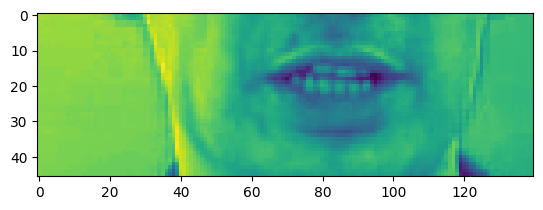

In [63]:
plt.imshow(frames[40])

In [64]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [65]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [66]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [67]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [105]:
#training
from matplotlib import pyplot as plt

In [68]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [69]:
len(test)

50

In [70]:
frames, alignments = data.as_numpy_iterator().next()

In [71]:
len(frames)

2

In [72]:
sample = data.as_numpy_iterator()

In [73]:
val = sample.next(); val[0]

array([[[[[ 1.5562865 ],
          [ 1.4845963 ],
          [ 1.4487511 ],
          ...,
          [ 0.30170748],
          [ 0.30170748],
          [ 0.30170748]],

         [[ 1.5204413 ],
          [ 1.4487511 ],
          [ 1.4845963 ],
          ...,
          [ 0.30170748],
          [ 0.30170748],
          [ 0.30170748]],

         [[ 1.4129059 ],
          [ 1.4129059 ],
          [ 1.3770609 ],
          ...,
          [ 0.3733977 ],
          [ 0.30170748],
          [ 0.30170748]],

         ...,

         [[ 1.0186098 ],
          [ 1.0186098 ],
          [ 1.0186098 ],
          ...,
          [ 0.01494658],
          [ 0.01494658],
          [ 0.01494658]],

         [[ 1.0186098 ],
          [ 1.0186098 ],
          [ 1.0186098 ],
          ...,
          [ 0.01494658],
          [ 0.01494658],
          [ 0.01494658]],

         [[ 1.0186098 ],
          [ 1.0186098 ],
          [ 1.0186098 ],
          ...,
          [ 0.01494658],
          [ 0.01494658],
          

In [35]:
imageio.mimsave('./animation.gif', val[0][0], fps=10) #image to gif

TypeError: Cannot handle this data type: (1, 1, 1), <f4

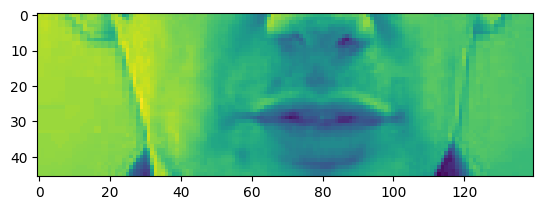

In [74]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [75]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set blue with u six please'>

# 3. Design the Deep Neural Network

In [45]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [76]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [77]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation_3 (Activation)   (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d_3 (MaxPoolin  (None, 75, 23, 70, 128)   0         
 g3D)                                                            
                                                                 
 conv3d_4 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_4 (Activation)   (None, 75, 23, 70, 256)   0         
                                                      

In [79]:
5*17*75

6375

In [80]:
print("Shape of val[0]:", val[0].shape)


Shape of val[0]: (2, 75, 46, 140, 1)


In [81]:
yhat = model.predict(val[0])

2024-03-09 15:59:47.440419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907


1/1 [==============================] - 41s 41s/step


In [82]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'bbbbbbbbbbbbbbwwwwwwwwwwwwwwwwwwwwzzwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwu'>

In [83]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bbbbbbbbbbbbbbwwwwwwwwwwwwwwwwwwwwzzwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwu'>

In [84]:
model.input_shape

(None, 75, 46, 140, 1)

In [85]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [86]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [87]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss
#from automatic speech rec using ctc

In [52]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)
#output predictions

In [88]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [89]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [90]:
schedule_callback = LearningRateScheduler(scheduler)

In [68]:
example_callback = ProduceExample(test)

In [91]:
from tensorflow.keras.optimizers import Adam

# Compile the model with Adam optimizer and CTCLoss
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=CTCLoss)

# No changes needed for the checkpoint and scheduler callbacks
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 
schedule_callback = LearningRateScheduler(scheduler)

# Fit the model
model.fit(train, validation_data=test, epochs=100, steps_per_epoch=100, callbacks=[checkpoint_callback,schedule_callback])


Epoch 1/100


2024-03-09 16:06:05.168925: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fecac4342a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-09 16:06:05.169006: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla P100-PCIE-12GB, Compute Capability 6.0
2024-03-09 16:06:05.169028: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): Tesla P100-PCIE-12GB, Compute Capability 6.0
2024-03-09 16:06:06.304989: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-09 16:06:09.707332: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 [==============================] - ETA: 0s - loss: 112.0367

[mpeg1video @ 0x7fea5404b3c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7fea5404b3c0] Warning MVs not available


100/100 [==============================] - 785s 7s/step - loss: 112.0367 - val_loss: 86.0549 - lr: 1.0000e-04
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 83.1555

2024-03-09 16:20:58.945260: W tensorflow/core/framework/op_kernel.cc:1827] UNKNOWN: InvalidArgumentError: {{function_node __wrapped__ResizeBilinear_device_/job:localhost/replica:0/task:0/device:CPU:0}} input image must be of non-zero size [Op:ResizeBilinear] name: 
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/tmp/ipykernel_8380/943023924.py", line 8, in load_data
    frames = load_video(video_path)

  File "/tmp/ipykernel_8

UnknownError: Graph execution error:

Detected at node EagerPyFunc defined at (most recent call last):
<stack traces unavailable>
Detected at node EagerPyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNKNOWN:  InvalidArgumentError: {{function_node __wrapped__Squeeze_device_/job:localhost/replica:0/task:0/device:GPU:0}} Can not squeeze dim[0], expected a dimension of 1, got 46 [Op:Squeeze] name: 
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/tmp/ipykernel_8380/943023924.py", line 8, in load_data
    frames = load_video(video_path)

  File "/tmp/ipykernel_8380/786410859.py", line 8, in load_video
    frame = tf.image.resize(frame, target_shape[1:3])  # Resize the frame

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 153, in error_handler
    raise e.with_traceback(filtered_tb) from None

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/ops.py", line 5888, in raise_from_not_ok_status
    raise core._status_to_exception(e) from None  # pylint: disable=protected-access

tensorflow.python.framework.errors_impl.InvalidArgumentError: {{function_node __wrapped__Squeeze_device_/job:localhost/replica:0/task:0/device:GPU:0}} Can not squeeze dim[0], expected a dimension of 1, got 46 [Op:Squeeze] name: 


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) UNKNOWN:  InvalidArgumentError: {{function_node __wrapped__Squeeze_device_/job:localhost/replica:0/task:0/device:GPU:0}} Can not squeeze dim[0], expected a dimension of 1, got 46 [Op:Squeeze] name: 
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/tmp/ipykernel_8380/943023924.py", line 8, in load_data
    frames = load_video(video_path)

  File "/tmp/ipykernel_8380/786410859.py", line 8, in load_video
    frame = tf.image.resize(frame, target_shape[1:3])  # Resize the frame

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 153, in error_handler
    raise e.with_traceback(filtered_tb) from None

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/ops.py", line 5888, in raise_from_not_ok_status
    raise core._status_to_exception(e) from None  # pylint: disable=protected-access

tensorflow.python.framework.errors_impl.InvalidArgumentError: {{function_node __wrapped__Squeeze_device_/job:localhost/replica:0/task:0/device:GPU:0}} Can not squeeze dim[0], expected a dimension of 1, got 46 [Op:Squeeze] name: 


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_468718]

[mpeg1video @ 0x7fe9e401d300] ac-tex damaged at 22 17
[mpeg1video @ 0x7fe9e401d300] Warning MVs not available


In [70]:
model.fit(train, validation_data=test, epochs=100,steps_per_epoch=90, callbacks=[checkpoint_callback, schedule_callback])

Epoch 1/100


90/90 [==============================] - ETA: 0s - loss: 73.7316

[mpeg1video @ 0x7fd700081940] ac-tex damaged at 22 17
[mpeg1video @ 0x7fd700081940] Warning MVs not available
[mpeg1video @ 0x7fd7c4352600] ac-tex damaged at 22 17
[mpeg1video @ 0x7fd7c4352600] Warning MVs not available


90/90 [==============================] - 420s 5s/step - loss: 73.7316 - val_loss: 69.7430 - lr: 1.0000e-04
Epoch 2/100
90/90 [==============================] - ETA: 0s - loss: 72.0127

[mpeg1video @ 0x7fd87008e600] ac-tex damaged at 22 17
[mpeg1video @ 0x7fd87008e600] Warning MVs not available


90/90 [==============================] - 421s 5s/step - loss: 72.0127 - val_loss: 69.0351 - lr: 1.0000e-04
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 71.8023

[mpeg1video @ 0x7fd55c01f680] ac-tex damaged at 22 17
[mpeg1video @ 0x7fd55c01f680] Warning MVs not available


90/90 [==============================] - 423s 5s/step - loss: 71.8023 - val_loss: 67.6990 - lr: 1.0000e-04
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 70.8857

2024-03-09 10:57:56.721422: W tensorflow/core/framework/op_kernel.cc:1827] UNKNOWN: InvalidArgumentError: {{function_node __wrapped__Pack_N_75_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [46,140,1] != values[5].shape = [46,0,360] [Op:Pack] name: packed
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/tmp/ipykernel_5066/943023924.py", line 8, in load_data
    frames = 

# 5. Make a Prediction 

In [4]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (original): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=05f7b52e-506b-45dc-b05f-f64f6a3a7d5a
To: d:\N\private\checkpoints.zip
100%|██████████| 94.5M/94.5M [00:39<00:00, 2.41MB/s]


['models\\checkpoint.index',
 'models\\__MACOSX/._checkpoint.index',
 'models\\checkpoint.data-00000-of-00001',
 'models\\__MACOSX/._checkpoint.data-00000-of-00001',
 'models\\checkpoint',
 'models\\__MACOSX/._checkpoint']

In [53]:
model.load_weights('models/checkpoint')

In [54]:
test_data = test.as_numpy_iterator()

In [56]:
sample = test_data.next()

In [57]:
yhat = model.predict(sample[0])

1/1 [==============================] - 1s 973ms/step


In [58]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'place white at x six please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay blue in x four now'>]

In [59]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [60]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'place white at x six please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay blue in x four now'>]

# Test on a Video

In [61]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bras9a.mpg'))

In [62]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [63]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 1s 720ms/step


In [64]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [65]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]